# EDA

**Importing** the neccessary **libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


**Importing** the **dataset**

In [3]:
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Finding **Frequencies** of each numeric column

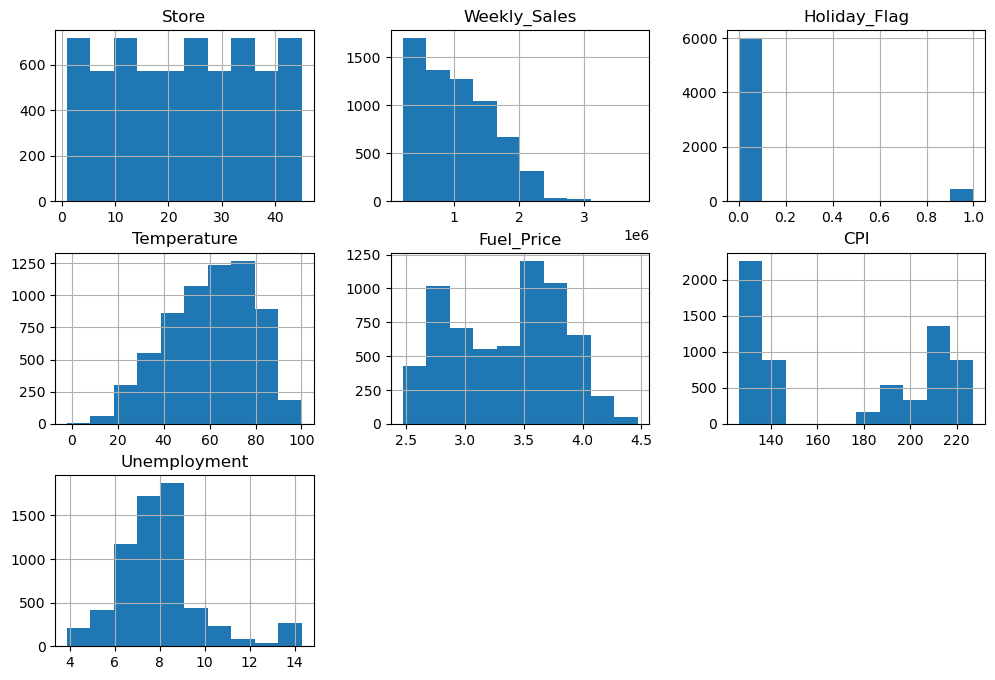

In [4]:
df.hist(figsize=(12,8));

Finding **Outliers**

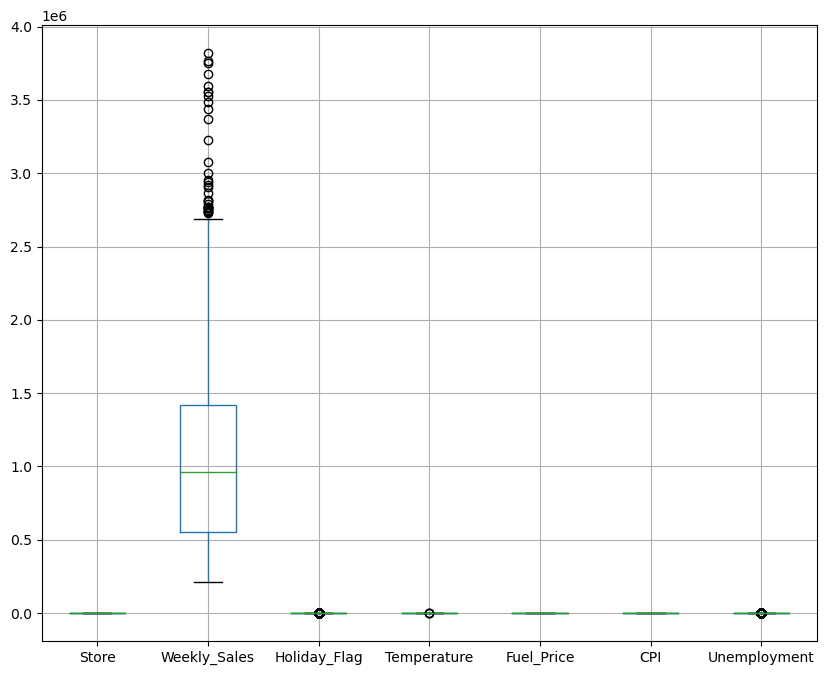

In [57]:
df.boxplot(figsize=(10,8));

Attempting to see **other outliers** that are hidden by 'Weekly_Sales' having such high values

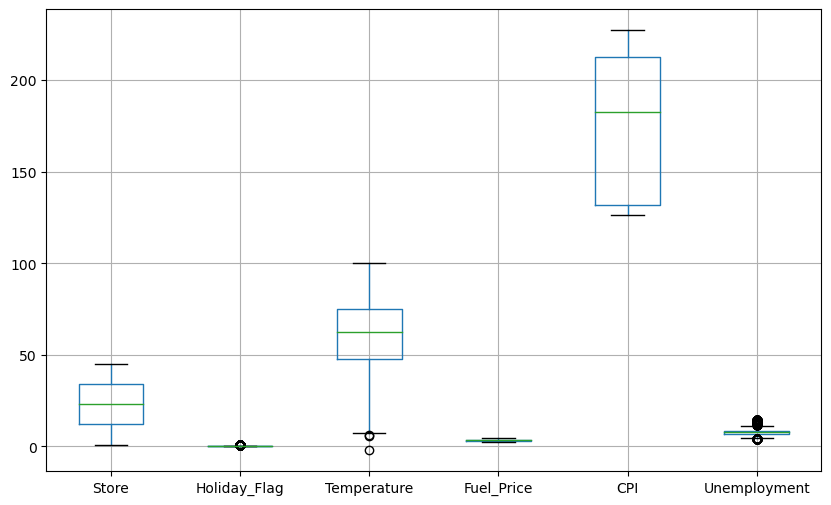

In [250]:
df_copy = df.copy()

df_copy.drop(columns = 'Weekly_Sales', inplace=True)
df_copy.boxplot(figsize=(10,6));

Clearly, there are outliers in the **'Weekly_Sales'** column. What should we do with them? Are these outliers reasonable? Below, I find the actual observations shown as outliers above. 

In [59]:
column_name = 'Weekly_Sales'

# Calculate the quartiles
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame using the outlier bounds
outliers_df = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# View the outliers as a DataFrame
outliers_df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,16-12-2011,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,24-12-2010,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003


After examining the data and identifying outliers using the Interquartile Range (IQR) method, it can be concluded that the outliers present in the dataset are reasonable. The outliers were determined based on the distribution of the 'Weekly_Sales' column, considering values that fall beyond the upper and lower bounds defined by 1.5 times the IQR. These outliers are justifiable due to the nature of the sales data, which may include exceptional sales events or unique circumstances that significantly deviate from the typical sales pattern. Therefore, retaining these outliers in the analysis would provide a comprehensive understanding of the sales behavior and potential influential factors

Finding **Correlations** between the columns

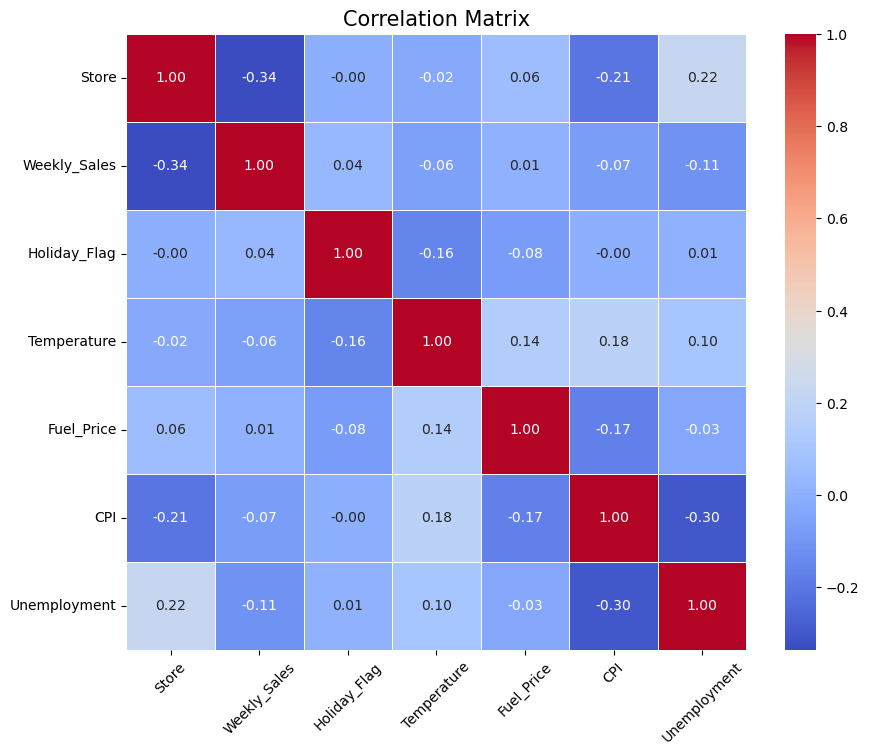

In [60]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=15)
plt.xticks(rotation=45);

Examining the **Relationship** between the **Numeric Columns**

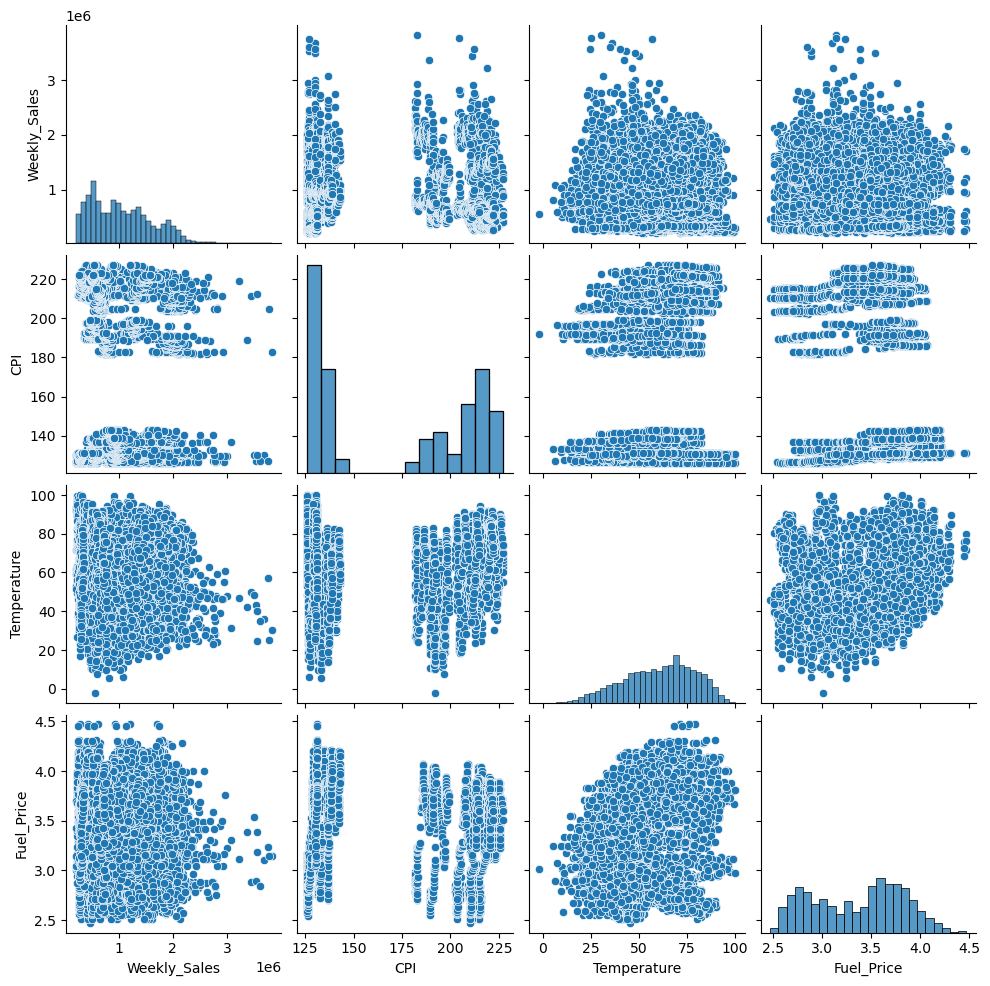

In [6]:

# Select the relevant numerical columns for the scatter plot matrix
numerical_columns = ['Weekly_Sales', 'CPI', 'Temperature', 'Fuel_Price']

# Create a pairplot using seaborn
sns.pairplot(df[numerical_columns]);



### EDA on **'Store'** Column

Finding **unique** values

In [61]:
unique_values = df['Store'].unique()
print(unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


Finding **all value counts**

In [62]:
df.Store.value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

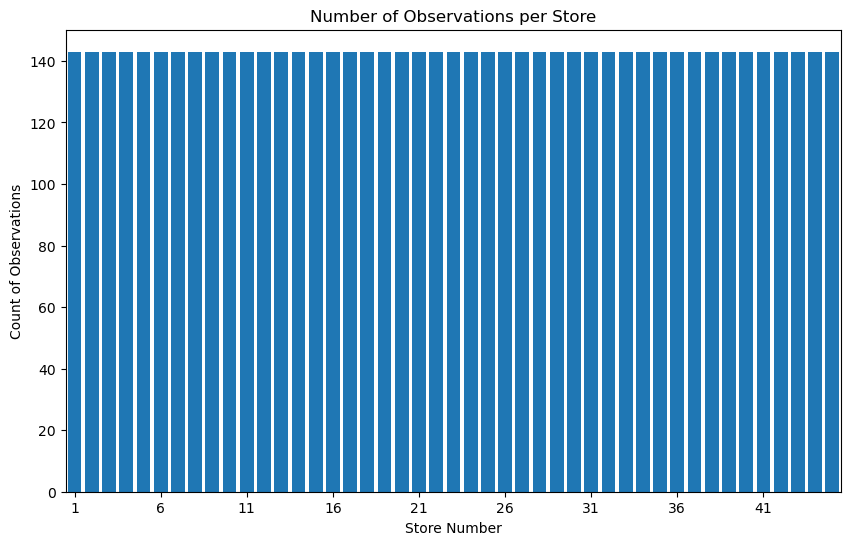

In [63]:
# Count the number of occurrences of each store
store_counts = df['Store'].value_counts()

# Sort the stores in ascending order
sorted_stores = store_counts.sort_index()

# Create an array of x-axis tick locations
x_ticks = np.arange(1, len(sorted_stores) + 1)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

plt.bar(x_ticks, sorted_stores.values)  # Create a bar plot with original x-axis values

plt.xlabel('Store Number')  # Set the x-axis label
plt.ylabel('Count of Observations')  # Set the y-axis label
plt.title('Number of Observations per Store')  # Set the plot title

plt.xticks(x_ticks[::5])  # Set the x-axis tick locations at every 5th value
plt.xlim(0.5, len(sorted_stores) + 0.5)  # Set the x-axis limits to include all bars



### EDA on **'Date'** Column

Finding the **unique** values 

In [70]:
unique_values = df['Date'].unique()
print(unique_values)

['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-2011' '15-04-2011' '22-04-2011' '29-04-2011'
 '06-05-2011' '13-05-2011' '20-05-2011' '27-05-2011' '03-06-2011'
 '10-06-2011' '17-06-2011' '24-06-2011' '01-07-2011' '08-07-2011'
 '15-07-20

Finding **all value counts**

In [72]:
df.Date.value_counts()

05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: Date, Length: 143, dtype: int64


Examining the counts for **years**

In [119]:
year_counts = pd.to_datetime(df['Date']).dt.year

# Count the occurrences of each year
year_counts = year_counts.value_counts()

# Print the count of each year
print(year_counts)


2011    2340
2010    2160
2012    1935
Name: Date, dtype: int64


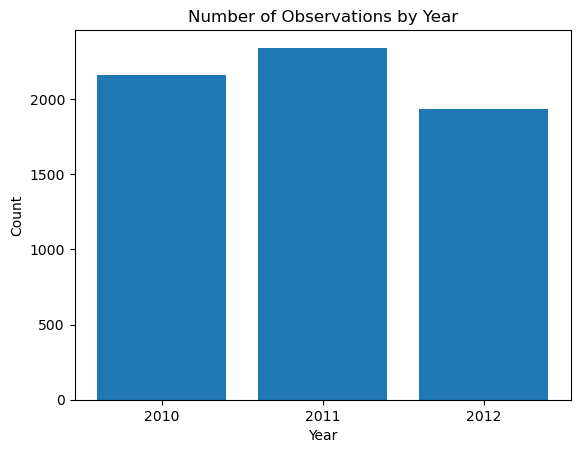

In [123]:
x_values = year_counts.index
height_values = year_counts.values

plt.bar(x=x_values, height=height_values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Observations by Year');
plt.xticks(x_values);



Examining the counts for **months**

In [99]:
month_counts = pd.to_datetime(df['Date']).dt.month

month_counts = month_counts.value_counts()

print(month_counts)

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Date, dtype: int64


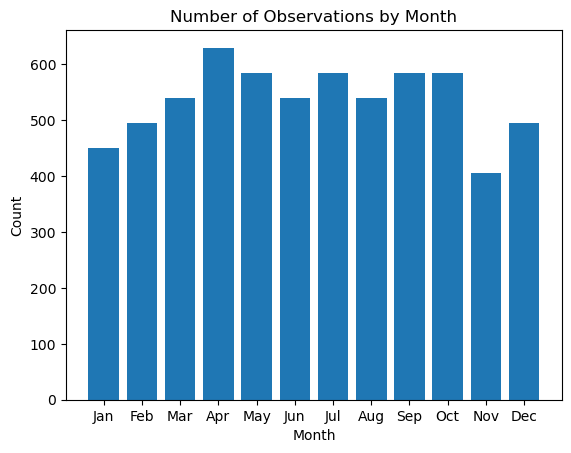

In [115]:
# Define the names of the months for better x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(x=x_values, height=height_values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Observations by Month')

# Set the x-axis ticks and labels
plt.xticks(x_values, month_names);


Examining the counts for **days**

In [136]:
day_counts = pd.to_datetime(df['Date']).dt.day

day_counts = day_counts.value_counts()

print(day_counts)

2     270
3     270
6     270
25    225
10    225
24    225
17    225
9     225
27    225
20    225
13    225
8     225
19    225
7     225
18    225
30    225
26    225
16    225
23    225
4     225
5     180
14    180
28    180
21    180
15    180
22    180
29    180
11    180
12    180
31     90
1      90
Name: Date, dtype: int64


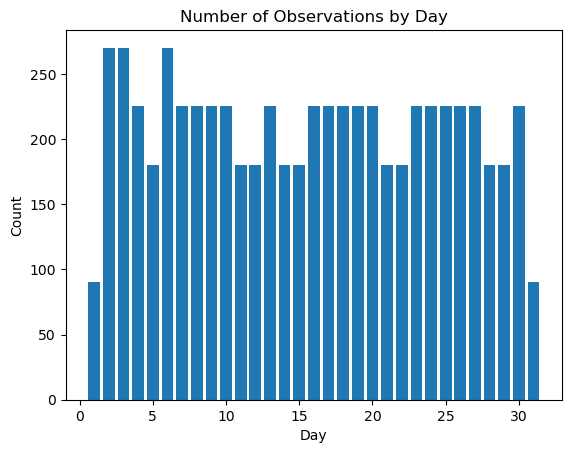

In [113]:
x_values = day_counts.index
height_values = day_counts.values

plt.bar(x=x_values, height=height_values)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Number of Observations by Day');

Visualizing counts by **day of the week**

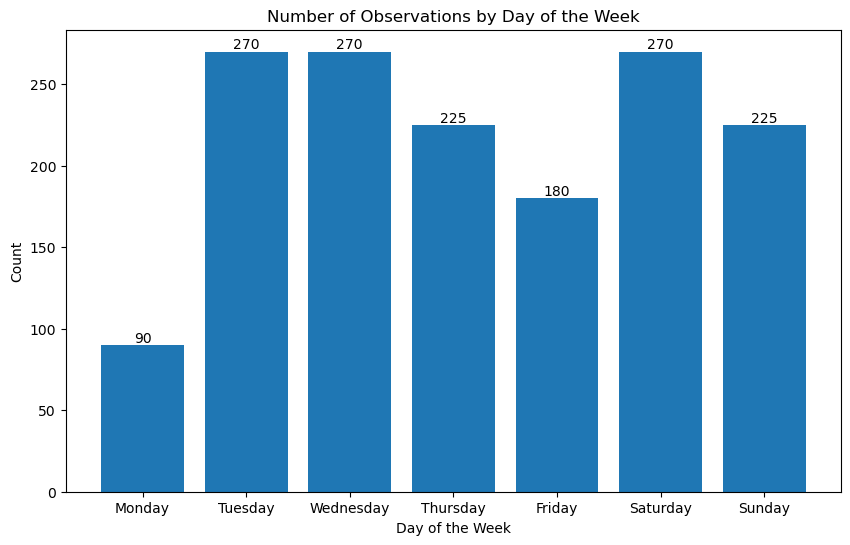

In [146]:
# Map the day of the week index to the corresponding day name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the days of the week in chronological order
sorted_day_counts = day_counts.reindex(range(1, 8))

# Plot the day counts
plt.figure(figsize=(10,6))
plt.bar(x=day_names, height=sorted_day_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of Observations by Day of the Week');

# Add data labels to the bars
for i, count in enumerate(sorted_day_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')



### EDA on **Holiday_Flag** Column

Finding the **unique** values in the column

In [124]:
unique_values = df['Holiday_Flag'].unique()
print(unique_values)

[0 1]


In [125]:
df["Holiday_Flag"].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

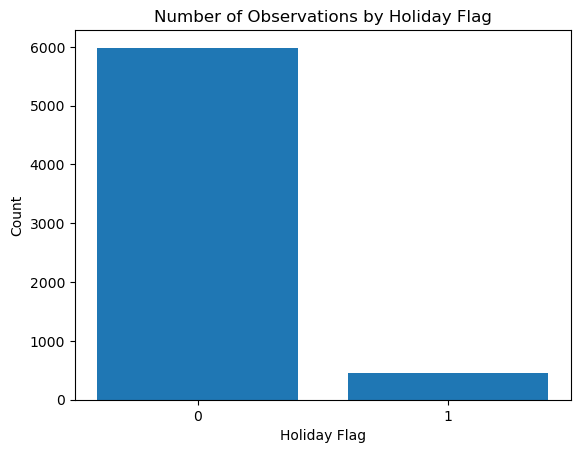

In [129]:
holiday_flag_counts = df["Holiday_Flag"].value_counts()

plt.bar(x=holiday_flag_counts.index, height=holiday_flag_counts.values)
plt.title('Number of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.xticks(holiday_flag_counts.index);

### EDA on **Temperature**

How many **unique** values are there?

In [150]:
unique_values = df['Temperature'].unique()
len(unique_values)

3528

Top 20 most common **temperatures**

In [176]:
temp = df['Temperature'].value_counts().to_frame()
temp.head(20)

,Temperature
50.43,11
67.87,10
76.67,9
76.03,9
70.28,9
72.62,9
50.56,8
64.21,8
64.05,8
78.47,7


Examining the **Max** and **Min** values

In [227]:
max_temp = df['Temperature'].max()
min_temp = df['Temperature'].min()

print("Maximum Temperature:", max_temp)
print("Minimum Temperature:", min_temp)


Maximum Temperature: 100.14
Minimum Temperature: -2.06


Visualizing the **frequencies**

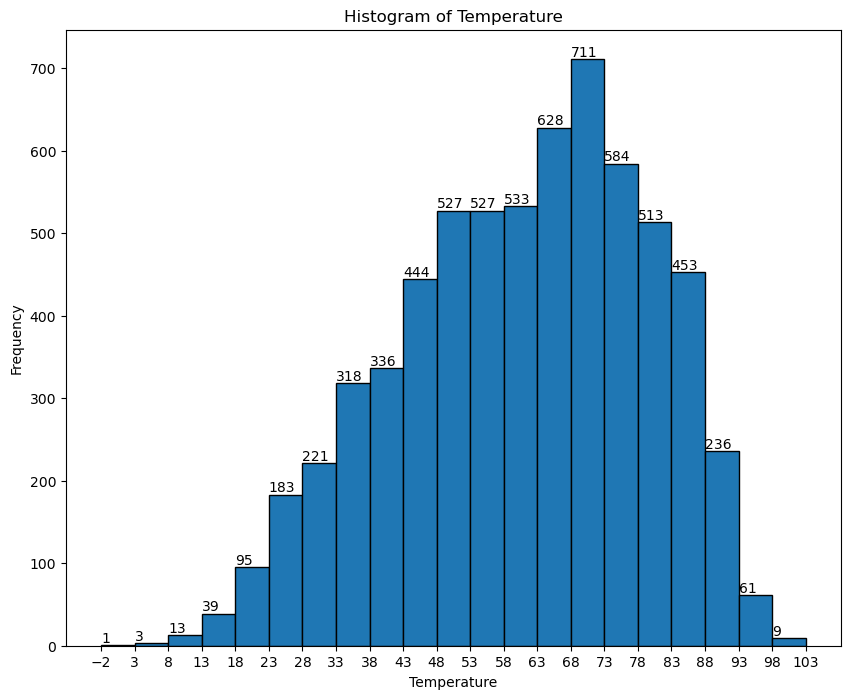

In [171]:
plt.figure(figsize=(10,8))
bin_size = 5
bin_edges = np.arange(df['Temperature'].min(), df['Temperature'].max() + bin_size, bin_size)


# Get the counts for each bin
counts, bins, _ = plt.hist(df['Temperature'], bins=bin_edges, edgecolor='black')


# Iterate over the counts and bins to add data labels
for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha='left', va='bottom')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Set the x-ticks to match the bin edges
plt.xticks(bins);



### EDA on **Fuel_Price**

How many **unique** values are there?

In [192]:
unique_values = df['Fuel_Price'].unique()
len(unique_values)

892

Top 20 most common **frequencies**

In [193]:
fuel = df['Fuel_Price'].value_counts().to_frame()
fuel.head(20)

,Fuel_Price
3.638,39
3.630,34
2.771,29
3.891,29
3.524,28
2.720,28
3.594,28
3.523,27
3.666,27
3.129,25


Examining the **Max** and **Min** Fuel Prices

In [228]:
max_fuel = df['Fuel_Price'].max()
min_fuel = df['Fuel_Price'].min()

print("Maximum Fuel Price:", max_fuel)
print("Minimum Fuel Price:", min_fuel)


Maximum Fuel Price: 4.468
Minimum Fuel Price: 2.472


**Visualizing** the frequencies

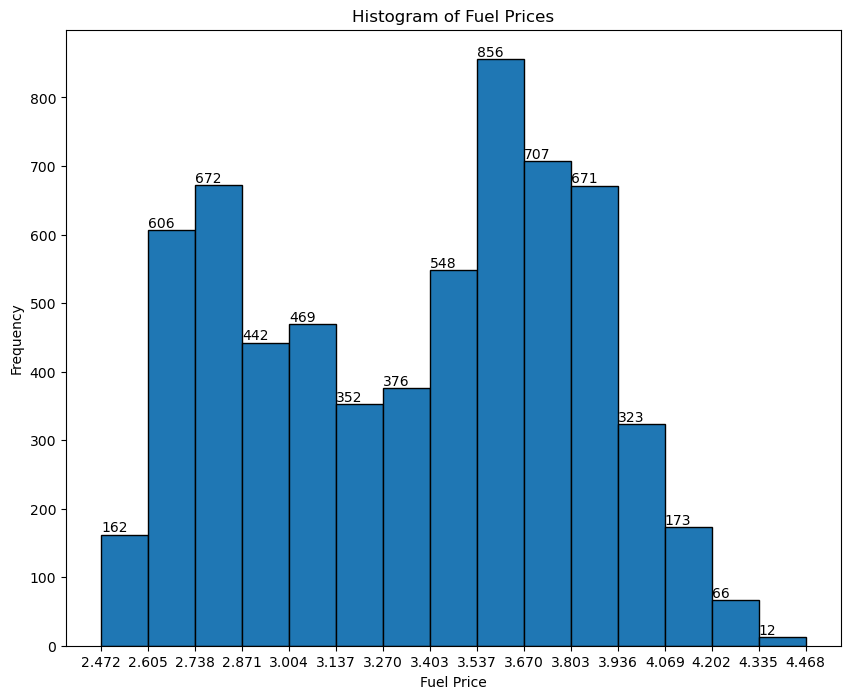

In [187]:
plt.figure(figsize=(10,8))


# Get the counts for each bin
counts, bins, _ = plt.hist(df['Fuel_Price'], bins=15, edgecolor='black')


# Iterate over the counts and bins to add data labels
for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha='left', va='bottom')

plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.title('Histogram of Fuel Prices')

# Set the x-ticks to match the bin edges
plt.xticks(bins);



### EDA on CPI

How many **unique** values are there?

In [190]:
unique_values = df['CPI'].unique()
len(unique_values)

2145

Top 20 **frequencies**

In [229]:
cpi = df['CPI'].value_counts().to_frame()
cpi.head(20)

,CPI
130.550207,11
129.043200,11
127.580032,11
127.440484,11
127.300935,11
127.191774,11
127.087677,11
126.983581,11
126.879484,11
126.793400,11


**Max** and **Min** CPI values

In [212]:
cpi_counts = df['CPI'].value_counts().to_frame()

max_cpi = cpi_counts['CPI'].idxmax()
min_cpi = cpi_counts['CPI'].idxmin()

print("Maximum CPI:", max_cpi)
print("Minimum CPI:", min_cpi)


Maximum CPI: 130.5502069
Minimum CPI: 210.7365392


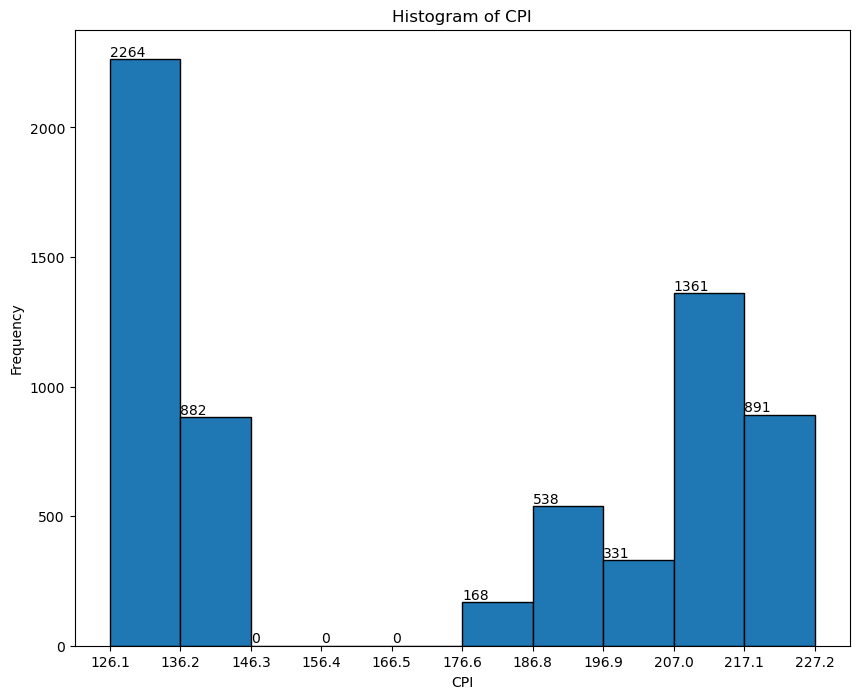

In [223]:
plt.figure(figsize=(10,8))


# Get the counts for each bin
counts, bins, _ = plt.hist(df['CPI'], bins=10, edgecolor='black')


# Iterate over the counts and bins to add data labels
for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha='left', va='bottom')

plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.title('Histogram of CPI')

# Set the x-ticks to match the bin edges
plt.xticks(bins);



### EDA on **Unemployment**

How many **unique** values are there?

In [232]:
unique_values = df['Unemployment'].unique()
len(unique_values)

349

Top 20 **frequencies**

In [234]:
unemployment = df['Unemployment'].value_counts().to_frame()
unemployment.head(20)

,Unemployment
8.099,78
8.163,56
7.852,56
8.200,52
6.565,52
6.891,52
7.057,52
7.441,52
7.931,52
7.343,50


Finding the **Max** and **Min** values

In [248]:
max_unemployment = df['Unemployment'].max()
min_unemployment = df['Unemployment'].min()

print("Maximum Unemployment:", max_unemployment)
print("Minimum Unemployment:", min_unemployment)


Maximum Unemployment: 14.313
Minimum Unemployment: 3.879


Plotting the **frequencies**

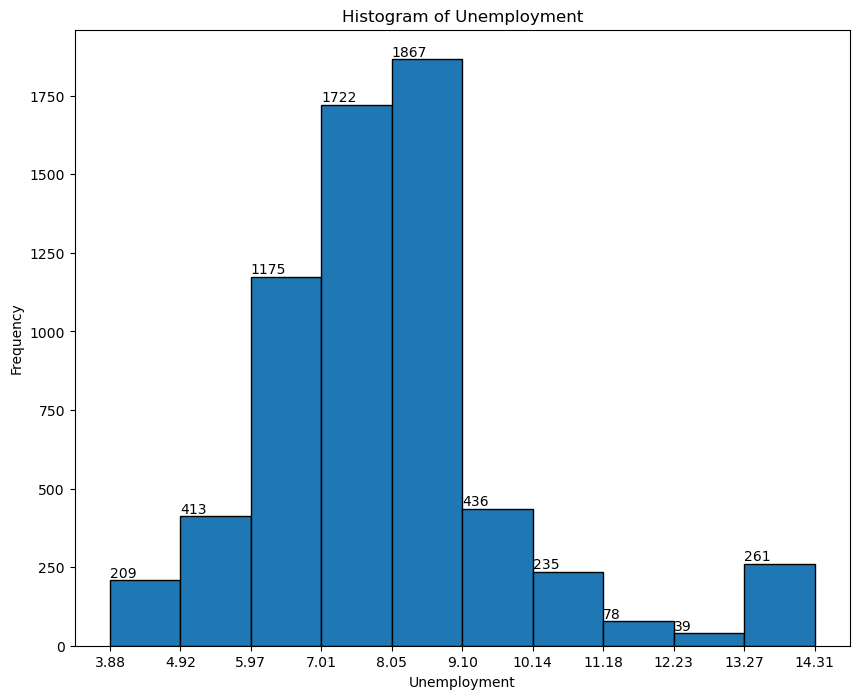

In [246]:
plt.figure(figsize=(10,8))


# Get the counts for each bin
counts, bins, _ = plt.hist(df['Unemployment'], bins=10, edgecolor='black')


# Iterate over the counts and bins to add data labels
for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha='left', va='bottom')

plt.xlabel('Unemployment')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment')

# Set the x-ticks to match the bin edges
plt.xticks(bins);

